# IMPORTING FILES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
%matplotlib inline

# IMPORTING FILES

In [2]:
data=pd.read_csv("Company Attrition Data.csv")
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sales_Occured,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sales_Occured,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Sales_Occured          14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# DATA VISIUALIZATION

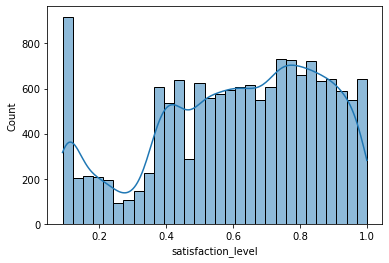

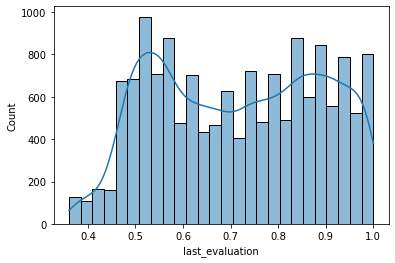

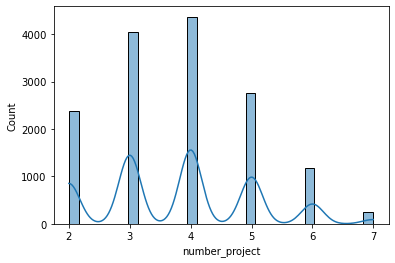

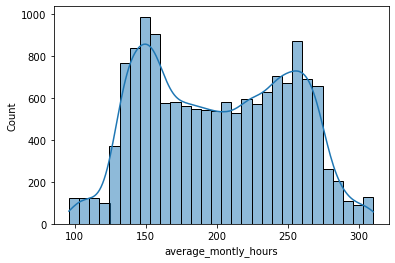

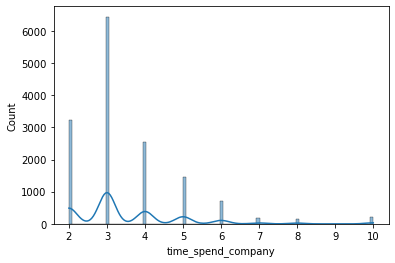

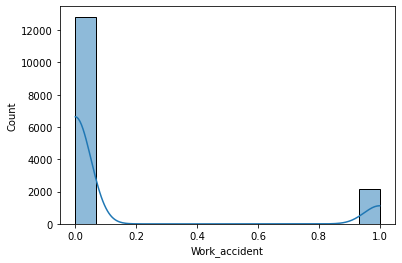

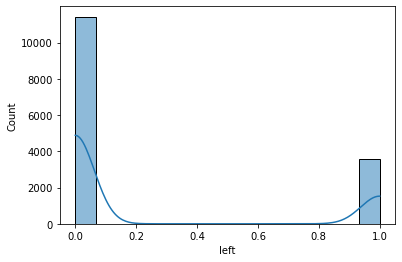

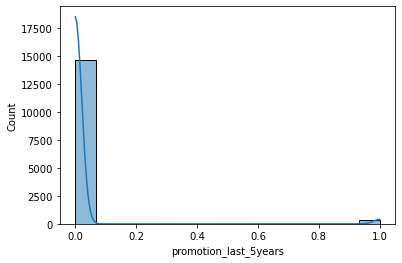

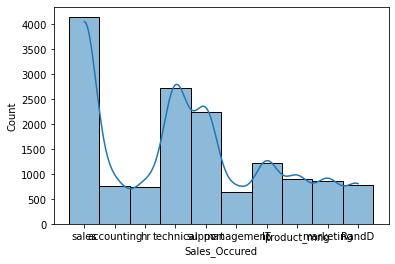

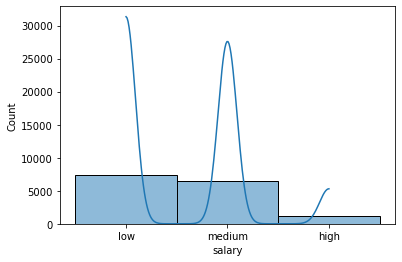

In [5]:
for i in list(data[:-1]):
    sns.histplot(data[i],kde=True)
    plt.show()

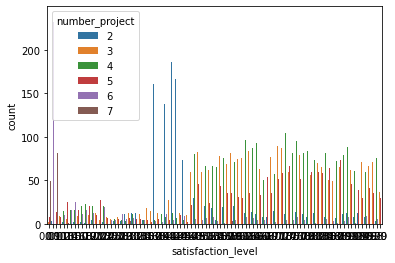

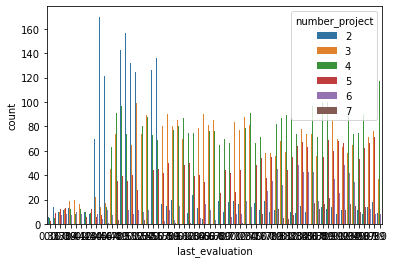

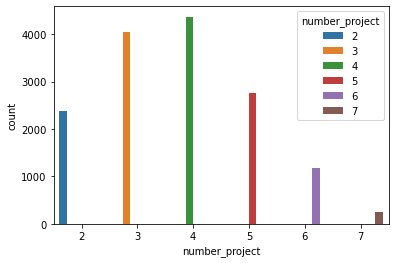

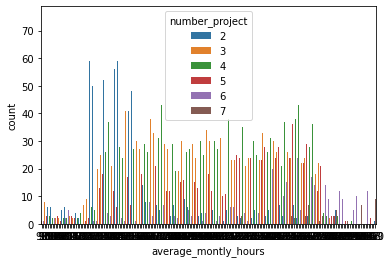

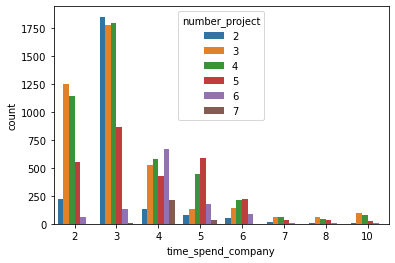

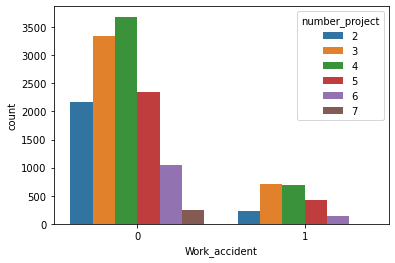

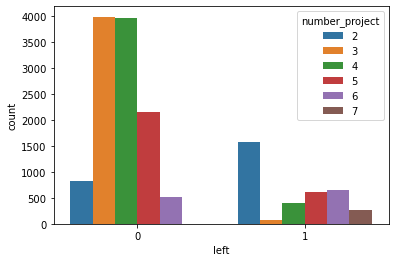

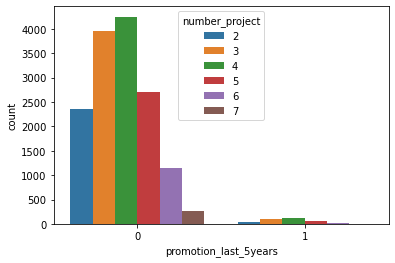

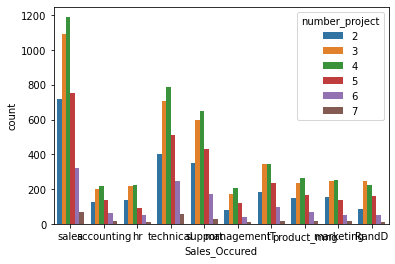

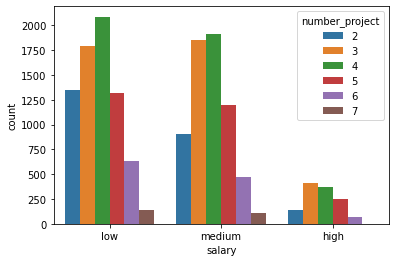

In [6]:
for i in list(data):
    sns.countplot(x=data[i],hue=data['number_project'])
    plt.show()

<AxesSubplot:>

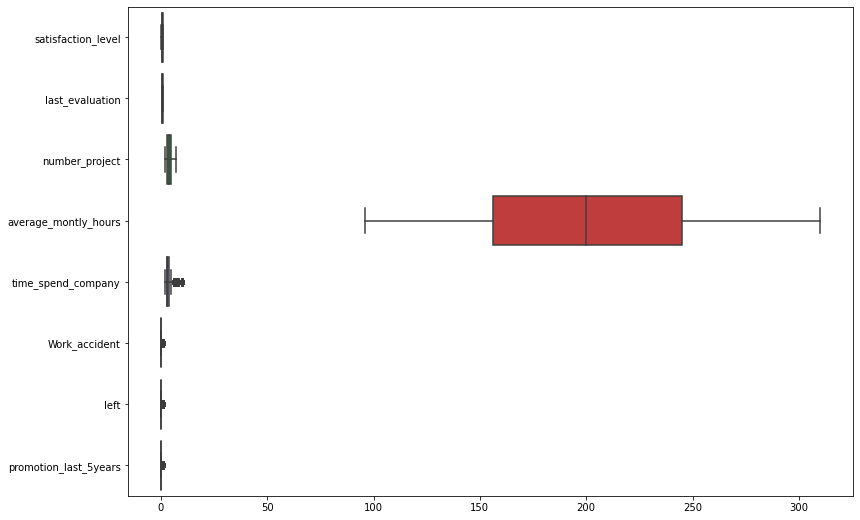

In [7]:
plt.figure(figsize=(13,9))

sns.boxplot(data=data,orient='h')

<AxesSubplot:>

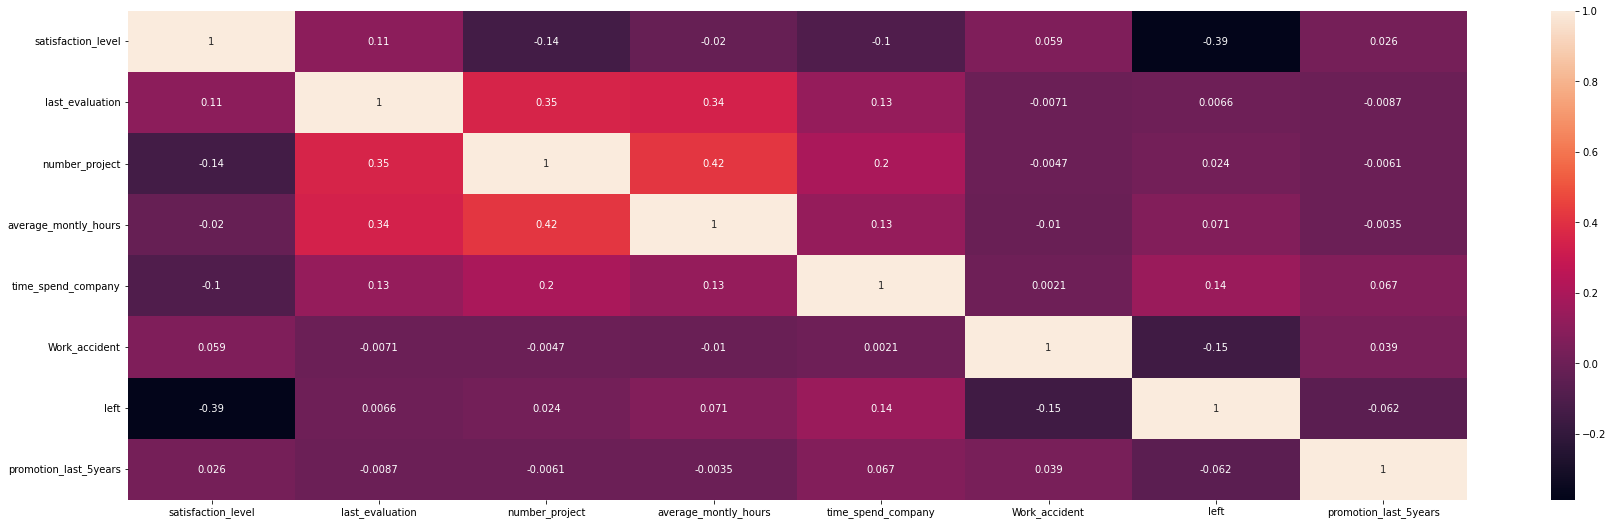

In [8]:
plt.figure(figsize=(30,9))
sns.heatmap(data.corr(),annot=True)

# OUTLIERS

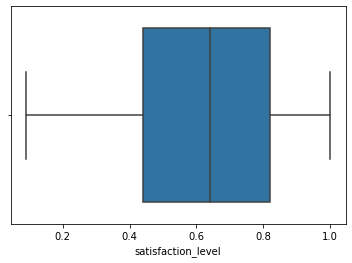

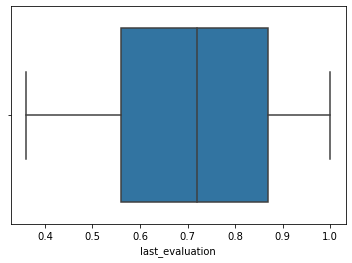

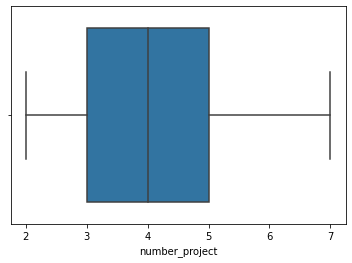

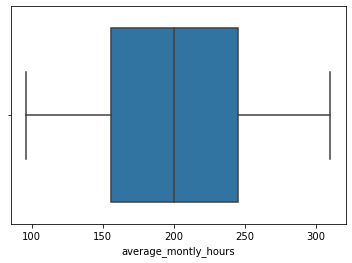

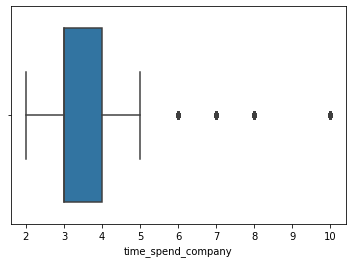

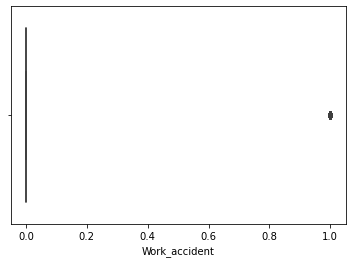

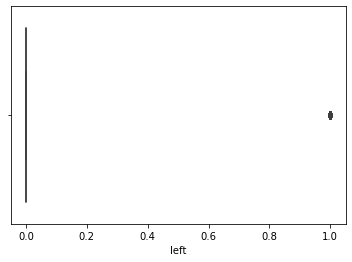

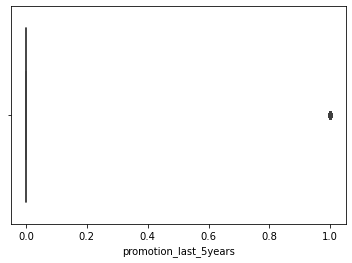

In [9]:
for i in data.describe().columns:
    sns.boxplot(x=data[i])
    plt.show()

# LABEL ENCODER

In [10]:
from sklearn.preprocessing import LabelEncoder
for i in data.columns:
    if data[i].dtype == np.int64:
        continue
    else:
        data[i] = LabelEncoder().fit_transform(data[i])

# DATA PREPROCESSING

In [11]:
data.columns
X=data.loc[:,['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']]
y=data.iloc[:,-4]

In [12]:
X
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

# IMPORTING MY MODEL LOGISTIC REGRESSION

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [14]:
xcol = X.columns

X = pd.DataFrame(sc.fit_transform(X),columns=xcol)

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)

LogisticRegression()

In [16]:
y_lr = lr.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_lr,y_test)




0.7617777777777778

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [20]:
rfc.fit(X_train,y_train)

y_rfc = rfc.predict(X_test)




In [18]:
accuracy_score(y_rfc,y_test)

0.9895555555555555

# HENCE GOT GOOD ACCURACY WITH MY MODEL RandomForestClassifier